In [3]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd

# Define Key Constrains on the dataset

The main constrains on the data are:

1. Metric - the raw dataset has prices at three points in the day: Open, High, and Close
2. Start and End Dates

In [4]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

## Obtaining Key Metrics

The first step is to obtain the measures such as Volatility, Annualized Volatility, Return per Month, and Annualized Return for all the companies within the dataset within the specified time frame and rank them.

Semideviation is volatility of the subset of returns that are negative.

In [7]:
key_stats = (fm.get_stats (returns, metric, start_date, end_date)
             [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Volatility', 'Semideviation', 'AnnualizedVolatility', 'ReturnPerMonth', 'AnnualizedReturn']]
             .sort_values(by=['MonthsInPeriod', 'ReturnPerMonth', 'AnnualizedReturn'], ascending=False))
key_stats

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Volatility,Semideviation,AnnualizedVolatility,ReturnPerMonth,AnnualizedReturn
CompanyId,,,,,,,,,
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.104,0.051,0.36,0.046,0.715
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.021,0.016,0.073,0.039,0.583
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.026,0.017,0.09,0.034,0.494
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.027,0.015,0.094,0.029,0.409
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.053,0.029,0.184,0.014,0.182
CHRT.XLON,COHORT PLC ORD 10P,2019-01,2021-12,36,0.02,0.016,0.069,0.01,0.127
MMX.XLON,MINDS + MACHINES GROUP LIMITED ORD NPV (DI),2019-01,2021-12,36,0.035,0.022,0.121,0.008,0.1
JEMI.XLON,JPMORGAN GLOBAL EMERGING MARKETS INCOME TRUST ...,2019-01,2021-12,36,0.017,0.013,0.059,0.005,0.062
GHH.XLON,GOOCH & HOUSEGO PLC ORD 20P,2019-01,2021-12,36,0.028,0.023,0.097,0.001,0.012


## Compare top two companies by return

According to the above table the top two companies within the specified period are:

1. ALIEN METALS LIMITED COM SHS NPV (DI)
2. INSTEM PLC ORD 10P

Despite the high returns for both companies, their volatility (and semidiviation) is significantly different (as per the diagram below):

<AxesSubplot:xlabel='Date'>

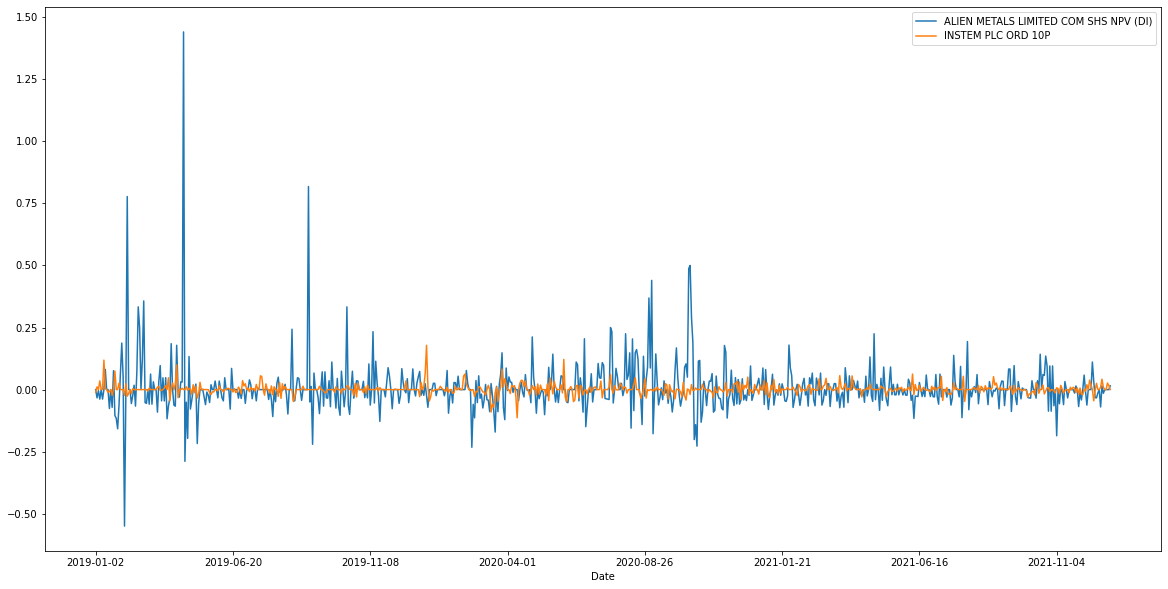

In [14]:
companies = ['UFO.XLON', 'INS.XLON']

returns_multiple = fm.compare_returns (companies, raw_data, metric, start_date, end_date)
returns_multiple.plot(figsize=(20, 10))

## Compare the drawdown of the top two companies

The drawdown function calculates the wealth index based on a $1000 start amount.

Despite **ALIEN METALS LIMITED COM SHS NPV (DI)** showing high returns in the second half of 2020, at the end of the examined time period the returns aren't much higher than in the case of **INSTEM PLC ORD 10P**.

<AxesSubplot:title={'center':'Wealth & Peaks : UFO.XLON'}, xlabel='Date'>

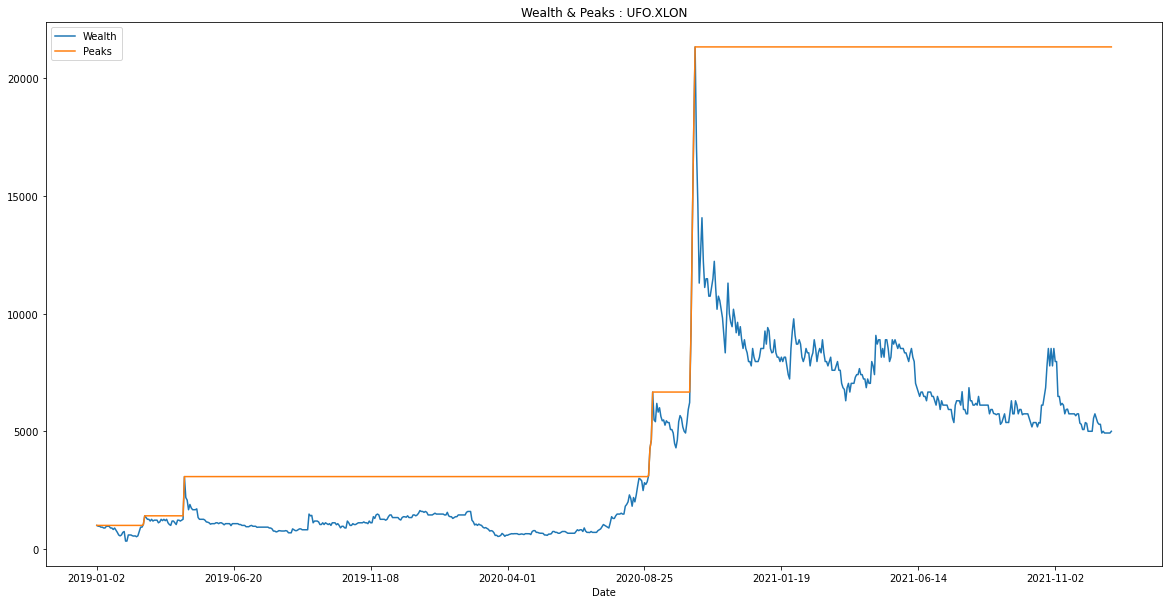

In [10]:
returns_1 = fm.get_returns_single_metric (companies[0], raw_data, start_date, end_date, metric)
fm.get_drawdown(returns_1)[['Wealth', 'Peaks']].plot(figsize=(20, 10), title = "Wealth & Peaks : " + companies[0])

<AxesSubplot:title={'center':'Drawdown : UFO.XLON'}, xlabel='Date'>

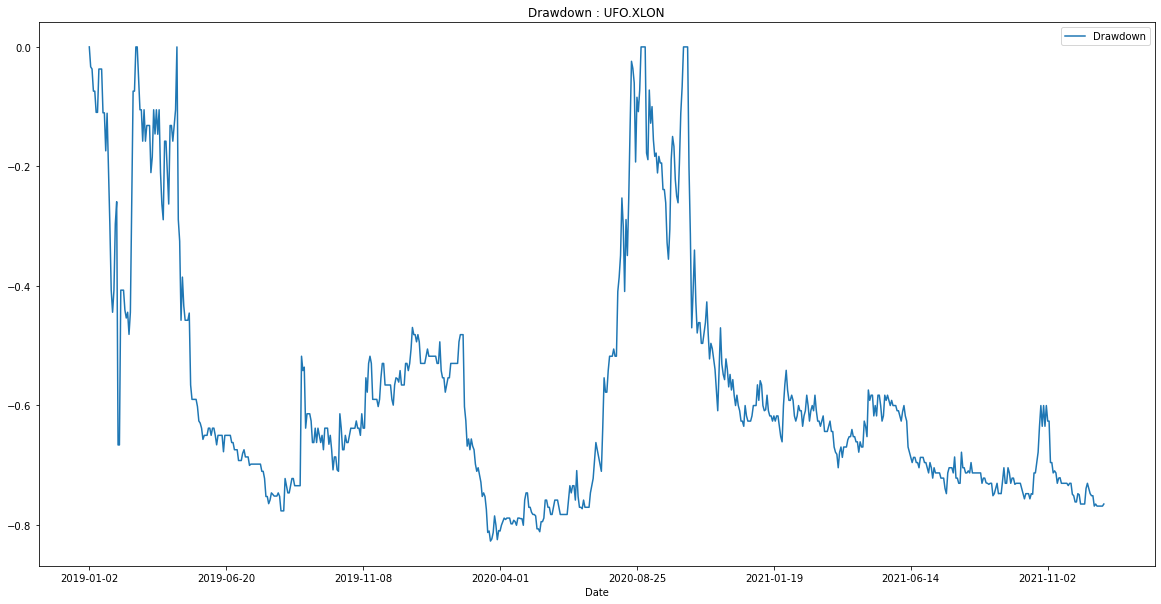

In [11]:
fm.get_drawdown(returns_1)[['Drawdown']].plot(figsize=(20, 10), title = "Drawdown : " + companies[0])

**INSTEM PLC ORD 10P** had a much lower volatility in the examined period and the wealth index growth is much more steady even if the ruturns are slightly lower than for **ALIEN METALS LIMITED COM SHS NPV (DI)**.

<AxesSubplot:title={'center':'UFO.XLON'}, xlabel='Date'>

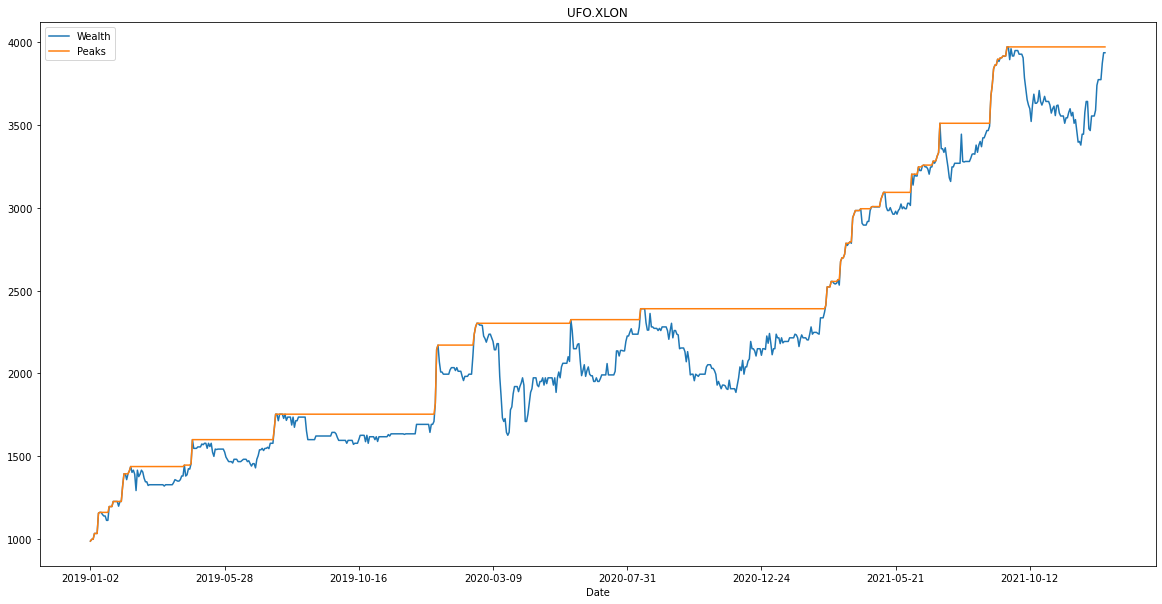

In [12]:
returns_2 = fm.get_returns_single_metric (companies[1], raw_data, start_date, end_date, metric)
fm.get_drawdown(returns_2)[['Wealth', 'Peaks']].plot(figsize=(20, 10), title=companies[0])

<AxesSubplot:title={'center':'Drawdown : UFO.XLON'}, xlabel='Date'>

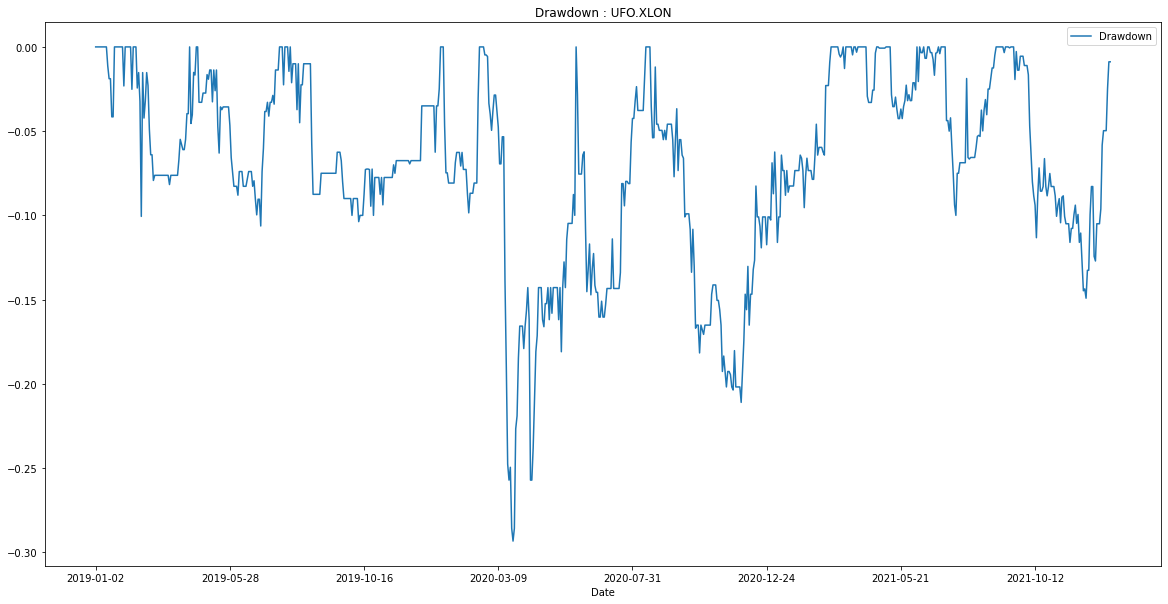

In [13]:
fm.get_drawdown(returns_2)[['Drawdown']].plot(figsize=(20, 10), title = "Drawdown : " + companies[0])

## Returns Distribution and Deviation from Normality

While both companies are far from normal distribution they have mean and median close to 0.  **ALIEN METALS LIMITED COM SHS NPV (DI)** is further away from normal distribution both in terms of Skew and Kurtosis.

array([[<AxesSubplot:title={'center':'ALIEN METALS LIMITED COM SHS NPV (DI)'}>,
        <AxesSubplot:title={'center':'INSTEM PLC ORD 10P'}>]],
      dtype=object)

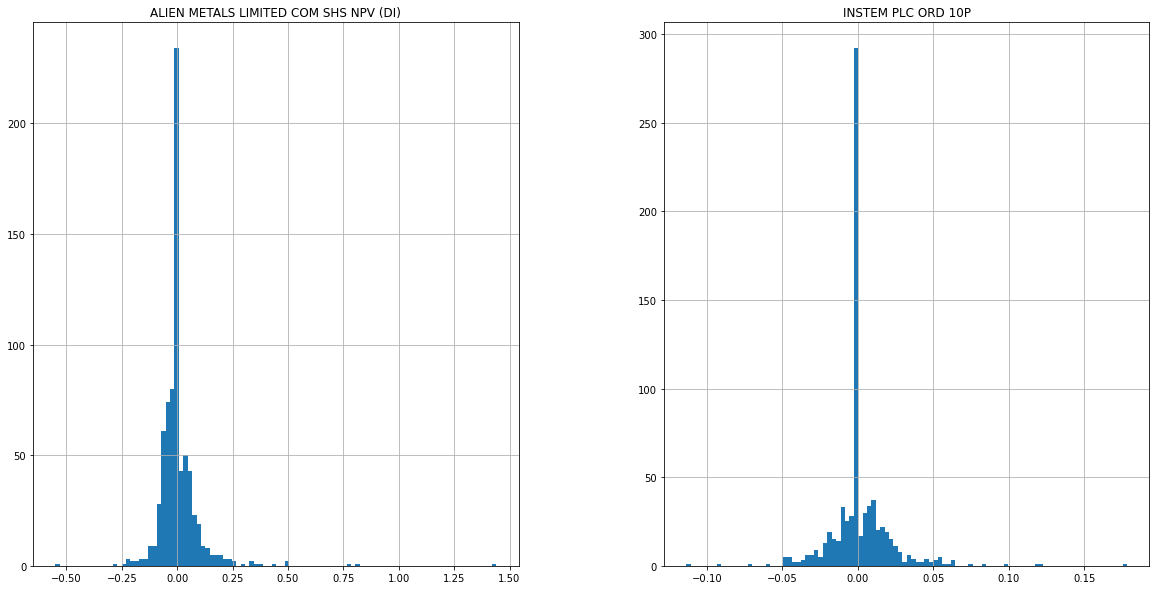

In [15]:
returns_multiple.hist(bins=100, figsize=(20, 10))

In [16]:
key_stats_comparison = (fm.get_stats (returns, metric, start_date, end_date)
                        [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Mean', 'Median', 'Skew', 'Kurtosis']])
key_stats_comparison[key_stats_comparison.index.isin(companies)]

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Mean,Median,Skew,Kurtosis
CompanyId,,,,,,,,
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.002,0.0,1.357,12.222
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.007,0.0,5.177,59.923
